In [595]:
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cross_validation import KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from mlxtend.plotting import plot_decision_regions
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from collections import Counter

In [254]:
with open('final_df.pkl', 'rb') as picklefile:
    df = pkl.load(picklefile)

In [255]:
def resize(x):
    if x == 2:
        return 1
    elif x == 3:
        return 2
    elif x == 4:
        return 3
    elif x == 5:
        return 3
    else:
        return x

In [256]:
df_bal = df
resize = [resize(x) for x in df_bal['Species Size']]
df_bal['Species Size'] = resize

In [258]:
df_bal.pop('is_bird')

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
168170    1
168175    1
168176    1
168177    1
168187    1
168189    1
168190    1
168191    1
168192    1
168193    1
168194    1
168198    1
168202    1
168203    1
168204    1
168205    1
168206    1
168207    1
168208    1
168209    1
168210    1
168211    1
168212    1
168214    1
168215    1
168216    1
168217    1
168218    1
168219    1
168220    1
Name: is_bird, Length: 160228, dtype: int64

In [594]:
with open('bird_data_for_app.pkl', 'wb') as picklefile:
    pkl.dump(test3, picklefile)

In [593]:
test3

,Species Size,Incident Month,Aircraft Mass,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,...,Flight Phase_LANDING ROLL,Flight Phase_LOCAL,Flight Phase_PARKED,Flight Phase_TAKEOFF RUN,Flight Phase_TAXI,Visibility_DAWN,Visibility_DAY,Visibility_DUSK,Visibility_NIGHT,Visibility_UNKNOWN
1,3,1,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,2,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,3,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3,3,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,3,3,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,3,4,4.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
10,3,4,2.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
11,3,4,2.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
12,3,4,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13,3,4,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [265]:
test3 = df_bal.iloc[:,37:]
test3.insert(loc=0, column='Species Size', value=df_bal['Species Size'])
test3.insert(loc=1, column='Incident Month', value=df_bal['Incident Month'])
test3.insert(loc=2, column='State', value=df_bal['State'])
test3.insert(loc=3, column='Aircraft Mass', value=df_bal['Aircraft Mass'])
test3.insert(loc=4, column='Visibility', value=df_bal['Visibility'])
test3.insert(loc=5, column='Flight Phase', value=df_bal['Flight Phase'])

# 'Species Size','Incident Month','State','Aircraft Mass','Visibility','Flight Phase'

In [267]:
test3.dropna(axis=0, inplace=True)

In [272]:
test3 = pd.get_dummies(test3, columns=['State','Flight Phase', 'Visibility'])

In [411]:
test3.head()

,Species Size,Incident Month,Aircraft Mass,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,...,Flight Phase_LANDING ROLL,Flight Phase_LOCAL,Flight Phase_PARKED,Flight Phase_TAKEOFF RUN,Flight Phase_TAXI,Visibility_DAWN,Visibility_DAY,Visibility_DUSK,Visibility_NIGHT,Visibility_UNKNOWN
1,3,1,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,2,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,3,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3,3,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,3,3,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [472]:
tgb = test3.groupby(by=['Incident Month','Species Size']).sum()
tgb

Aircraft Mass  Aircraft Damage  Radome Strike  \
Incident Month Species Size                                                  
1              1                    3976.0               50            192   
               2                    3319.0              134            124   
               3                    3582.0              360            125   
2              1                    3675.0               48            202   
               2                    2822.0              105             99   
               3                    3184.0              315            109   
3              1                    5111.0               72            262   
               2                    5083.0              211            208   
               3                    5234.0              539            170   
4              1                    9779.0               93            535   
               2                    7278.0              213            333   
               3                    5555.0              472            183   
5              1                   15860.0              100            830   
               2                    9310.0              189            441   
               3                    4918.0              371            133   
6              1                   12656.0              106            554   
               2                    6946.0              148            232   
               3                    4071.0              263            109   
7              1                   20715.0              130            934   
               2                   10877.0              202            380   
               3                    3906.0              268             96   
8              1                   23731.0              172           1117   
               2                   13164.0              271            517   
               3                    5074.0              399            157   
9              1                   21749.0              194           1146   
               2                   14522.0              322            706   
               3                    5721.0              480            202   
10             1                   16873.0              165            903   
               2                   14175.0              367            663   
               3                    6209.0              554            243   
11             1                    7819.0              103            418   
               2                    7622.0              292            327   
               3                    5470.0              593            194   
12             1                    4630.0               55            223   
               2                    3914.0              157            140   
               3                    4062.0              432            164   

                             Radome Damage  Windshield Strike  \
Incident Month Species Size                                     
1              1                         1                279   
               2                        22                136   
               3                        49                117   
2              1                         3                217   
               2                        12                123   
               3                        43                108   
3              1                         9                336   
               2                        29                259   
               3                        70                213   
4              1                        17                705   
               2                        36                405   
               3                        60                193   
5              1                        13               1129   
               2                        28                550   
               3        

In [469]:
print(tgb['Radome Strike'] / tgb['Radome Damage'])
print(tgb['Windshield Strike'] / tgb['Windshield Damage'])
print(tgb['Engine Ingested'])

Incident Month  Species Size
1               1               192.000000
                2                 5.636364
                3                 2.551020
2               1                67.333333
                2                 8.250000
                3                 2.534884
3               1                29.111111
                2                 7.172414
                3                 2.428571
4               1                31.470588
                2                 9.250000
                3                 3.050000
5               1                63.846154
                2                15.750000
                3                 3.325000
6               1                92.333333
                2                17.846154
                3                 3.633333
7               1               103.777778
                2                20.000000
                3                 4.800000
8               1               124.111111
                2        

In [385]:
test3_col = test3.columns
for col in test3_col:
    print(col)

Species Size
Incident Month
Aircraft Mass
Aircraft Damage
Radome Strike
Radome Damage
Windshield Strike
Windshield Damage
Nose Strike
Nose Damage
Engine1 Strike
Engine1 Damage
Engine2 Strike
Engine2 Damage
Engine3 Strike
Engine3 Damage
Engine4 Strike
Engine4 Damage
Engine Ingested
Propeller Strike
Propeller Damage
Wing or Rotor Strike
Wing or Rotor Damage
Fuselage Strike
Fuselage Damage
Landing Gear Strike
Landing Gear Damage
Tail Strike
Tail Damage
Lights Strike
Lights Damage
Other Strike
Other Damage
State_AB
State_AK
State_AL
State_AR
State_AZ
State_BC
State_CA
State_CO
State_CT
State_DC
State_DE
State_FL
State_GA
State_HI
State_IA
State_ID
State_IL
State_IN
State_KS
State_KY
State_LA
State_MA
State_MB
State_MD
State_ME
State_MI
State_MN
State_MO
State_MS
State_MT
State_NC
State_ND
State_NE
State_NH
State_NJ
State_NL
State_NM
State_NS
State_NV
State_NY
State_OH
State_OK
State_ON
State_OR
State_PA
State_PI
State_PR
State_QC
State_RI
State_SC
State_SD
State_SK
State_TN
State_TX
State_

In [388]:
test5 = test3[['Species Size','Incident Month','Aircraft Damage','Radome Damage','Windshield Damage','Nose Damage','Engine1 Damage','Engine2 Damage','Engine3 Damage','Engine4 Damage','Engine Ingested','Propeller Damage','Wing or Rotor Damage','Fuselage Damage','Landing Gear Damage','Tail Damage','Lights Damage','Other Damage']]
test5.head()

,Species Size,Incident Month,Aircraft Damage,Radome Damage,Windshield Damage,Nose Damage,Engine1 Damage,Engine2 Damage,Engine3 Damage,Engine4 Damage,Engine Ingested,Propeller Damage,Wing or Rotor Damage,Fuselage Damage,Landing Gear Damage,Tail Damage,Lights Damage,Other Damage
1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [294]:
test4 = test3[['Species Size','Incident Month','Aircraft Mass','Aircraft Damage','Windshield Strike','Nose Strike','Fuselage Strike','Radome Strike','Flight Phase_APPROACH','Wing or Rotor Strike','Other Strike','Flight Phase_CLIMB','State_TX','Flight Phase_LANDING ROLL','Flight Phase_TAKEOFF RUN','Visibility_DAY','State_CA','Landing Gear Strike','State_FL','Engine1 Strike','State_NY','Visibility_NIGHT','Wing or Rotor Damage','State_PA','Engine2 Strike','Engine Ingested','State_IL']]

test4.head()

,Species Size,Incident Month,Aircraft Mass,Aircraft Damage,Windshield Strike,Nose Strike,Fuselage Strike,Radome Strike,Flight Phase_APPROACH,Wing or Rotor Strike,...,Landing Gear Strike,State_FL,Engine1 Strike,State_NY,Visibility_NIGHT,Wing or Rotor Damage,State_PA,Engine2 Strike,Engine Ingested,State_IL
1,3,1,4.0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,3,2,3.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,3,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,3,2.0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [262]:
df_bal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160228 entries, 0 to 168220
Data columns (total 67 columns):
Species Name            160228 non-null object
Species Size            160228 non-null int64
Record ID               160228 non-null int64
Incident Year           160228 non-null int64
Incident Month          160228 non-null int64
Incident Day            160228 non-null int64
Operator ID             160228 non-null object
Operator                160228 non-null object
Aircraft                160228 non-null object
Aircraft Type           122441 non-null object
Aircraft Make           120531 non-null object
Aircraft Model          112914 non-null object
Aircraft Mass           116944 non-null float64
Engine Make             113611 non-null float64
Engine Model            112391 non-null object
Engines                 116945 non-null float64
Engine Type             116892 non-null object
Engine1 Position        115961 non-null object
Engine2 Position        109443 non-null float

In [67]:
test = df_bal.dropna(axis=0)
test

,Species Name,Species Size,Incident Month,Aircraft Mass,Flight Phase,Visibility,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
1,GULL,3,1,4.0,APPROACH,DAY,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GULL,3,2,3.0,APPROACH,DAY,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GULL,3,3,4.0,DESCENT,DAY,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GULL,3,3,5.0,CLIMB,DAY,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,GULL,3,3,2.0,APPROACH,DUSK,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,GULL,3,4,4.0,TAKEOFF RUN,DAY,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,GULL,3,4,2.0,TAKEOFF RUN,DAY,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,GULL,3,4,2.0,LANDING ROLL,NIGHT,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12,GULL,3,4,4.0,APPROACH,DUSK,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13,GULL,3,4,2.0,CLIMB,DAY,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


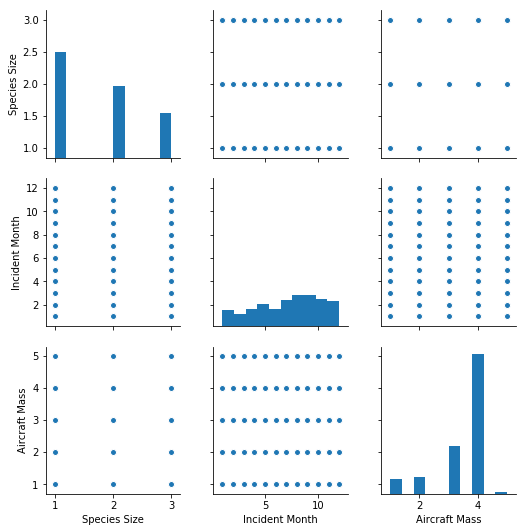

In [69]:
sns.pairplot(test.iloc[:,1:4])

In [70]:
test['Species Size'].value_counts()

1    43881
2    29725
3    18735
Name: Species Size, dtype: int64

In [81]:
test1 = pd.get_dummies(test, columns=['Flight Phase', 'Visibility'])
test1

,Species Name,Species Size,Incident Month,Aircraft Mass,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,...,Flight Phase_LANDING ROLL,Flight Phase_LOCAL,Flight Phase_PARKED,Flight Phase_TAKEOFF RUN,Flight Phase_TAXI,Visibility_DAWN,Visibility_DAY,Visibility_DUSK,Visibility_NIGHT,Visibility_UNKNOWN
1,GULL,3,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,GULL,3,2,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,GULL,3,3,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,GULL,3,3,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,GULL,3,3,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,GULL,3,4,4.0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
10,GULL,3,4,2.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
11,GULL,3,4,2.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
12,GULL,3,4,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13,GULL,3,4,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [90]:
# Helper function for printing confusion matrices (see: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823)
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [231]:
test2 = test1[['Incident Month','Aircraft Mass','Aircraft Damage','Nose Strike',
               'Windshield Strike','Fuselage Strike','Wing or Rotor Strike','Radome Strike',
               'Wing or Rotor Damage','Landing Gear Strike','Engine1 Strike','Flight Phase_APPROACH',
               'Visibility_DAY','Visibility_NIGHT']]

#,'Other Strike','Engine2 Strike','Flight Phase_CLIMB',
#               'Engine Ingested','Flight Phase_TAKEOFF RUN','Flight Phase_LANDING ROLL','Propeller Strike',
#               'Tail Strike','Flight Phase_DESCENT','Visibility_DUSK', 'Flight Phase_EN ROUTE'

test2.head()

,Incident Month,Aircraft Mass,Aircraft Damage,Nose Strike,Windshield Strike,Fuselage Strike,Wing or Rotor Strike,Radome Strike,Wing or Rotor Damage,Landing Gear Strike,Engine1 Strike,Flight Phase_APPROACH,Visibility_DAY,Visibility_NIGHT
1,1,4.0,0,0,0,0,0,0,0,0,0,1,1,0
2,2,3.0,0,0,0,0,0,0,0,0,0,1,1,0
3,3,4.0,0,0,0,0,0,0,0,0,0,0,1,0
4,3,5.0,0,0,0,0,0,0,0,0,0,0,1,0
5,3,2.0,0,0,0,0,0,1,0,0,0,1,0,0


In [638]:
X = test3.iloc[:,1:]
y = test3.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [639]:
X_smote, y_smote = SMOTE(random_state=5).fit_sample(X_train,y_train)

In [640]:
ssx = StandardScaler()
ssx_X_train = ssx.fit_transform(X_smote)
ssx_X_test = ssx.transform(X_test)

In [513]:
ssx_X_train.shape, y_smote.shape

((99822, 109), (99822,))

In [599]:
rf = RandomForestClassifier().fit(ssx_X_train, y_smote)
#class_weight={1:1,2:1.3,3:1.3}

In [600]:
pkl.dump(rf, open('model.pkl','wb'))

In [604]:
test3.head()

,Species Size,Incident Month,Aircraft Mass,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,...,Flight Phase_LANDING ROLL,Flight Phase_LOCAL,Flight Phase_PARKED,Flight Phase_TAKEOFF RUN,Flight Phase_TAXI,Visibility_DAWN,Visibility_DAY,Visibility_DUSK,Visibility_NIGHT,Visibility_UNKNOWN
1,3,1,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,2,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,3,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3,3,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,3,3,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [515]:
# test 3 
y_preds = rf.predict(ssx_X_train)
cross_val_score(rf, X=ssx_X_train, y=y_smote, cv=10)

array([0.52514022, 0.51652644, 0.51933093, 0.52263622, 0.62178138,
       0.64913335, 0.67307885, 0.74241058, 0.74371305, 0.7432121 ])

In [394]:
# test 5
y_preds = rf.predict(ssx_X_train)
cross_val_score(rf, X=ssx_X_train, y=y_smote, cv=10)

array([0.45342548, 0.45552885, 0.44821715, 0.45843349, 0.45857129,
       0.45396253, 0.45556557, 0.46057509, 0.45255986, 0.45867148])

In [378]:
# test 3 + regularize (max depth)
y_preds = rf.predict(ssx_X_train)
cross_val_score(rf, X=ssx_X_train, y=y_smote, cv=10)

array([0.52894631, 0.5390625 , 0.53585737, 0.54106571, 0.61476806,
       0.63771165, 0.66556457, 0.71545937, 0.71786394, 0.71245366])

In [279]:
# with test3
y_preds = rf.predict(ssx_X_train)
#rf.score(ssx_X_train, y_smote)
cross_val_score(rf, X=ssx_X_train, y=y_smote, cv=10)

array([0.52003205, 0.52303686, 0.52373798, 0.52033253, 0.62288348,
       0.64642821, 0.67367999, 0.7443142 , 0.73669973, 0.74982467])

In [300]:
# with test4
y_preds = rf.predict(ssx_X_train)
#rf.score(ssx_X_train, y_smote)
cross_val_score(rf, X=ssx_X_train, y=y_smote, cv=10)

array([0.49909856, 0.49358974, 0.4984976 , 0.50320513, 0.58100391,
       0.60524997, 0.61687206, 0.6548442 , 0.65193868, 0.65013526])

In [240]:
# with test2
y_preds = rf.predict(ssx_X_train)
#rf.score(ssx_X_train, y_smote)
cross_val_score(rf, X=ssx_X_train, y=y_smote, cv=10)

array([0.49046399, 0.49691622, 0.49088838, 0.49069856, 0.52638573,
       0.54204632, 0.54280562, 0.54954442, 0.55258162, 0.56093394])

In [182]:
# no class_weight
y_preds = rf.predict(ssx_X_train)
#rf.score(ssx_X_train, y_smote)
cross_val_score(rf, X=ssx_X_train, y=y_smote, cv=10)

array([0.49321568, 0.49340545, 0.49515945, 0.49392559, 0.54100228,
       0.57649962, 0.57536067, 0.60041762, 0.60155657, 0.60364465])

In [204]:
# have class_weight 
y_preds = rf.predict(ssx_X_train)
#rf.score(ssx_X_train, y_smote)
cross_val_score(rf, X=ssx_X_train, y=y_smote, cv=10)

array([0.49463896, 0.48856628, 0.48936978, 0.48823083, 0.53692103,
       0.57127942, 0.57773349, 0.59263478, 0.60241078, 0.60184131])

In [223]:
#for test2
most_important_features = {}
for feature, importance in zip(X.columns, rf.feature_importances_):
    most_important_features[feature] = importance
    
sorted(most_important_features.items(), key=lambda x: x[1], reverse=True)

[('Incident Month', 0.2550695904563294),
 ('Aircraft Mass', 0.11397397951144217),
 ('Aircraft Damage', 0.05776372329008779),
 ('Nose Strike', 0.043329248704642796),
 ('Windshield Strike', 0.03884740035838127),
 ('Fuselage Strike', 0.037299261981249845),
 ('Wing or Rotor Strike', 0.03599595014278475),
 ('Radome Strike', 0.03445526066075376),
 ('Wing or Rotor Damage', 0.029307247700210155),
 ('Landing Gear Strike', 0.026672819480637718),
 ('Engine1 Strike', 0.024798714618523076),
 ('Flight Phase_APPROACH', 0.023267772302566374),
 ('Visibility_DAY', 0.022466052862358844),
 ('Visibility_NIGHT', 0.02198019403557922),
 ('Other Strike', 0.020430227526451815),
 ('Engine2 Strike', 0.019936947103152185),
 ('Flight Phase_CLIMB', 0.018810252083018786),
 ('Engine Ingested', 0.018214205556406144),
 ('Flight Phase_TAKEOFF RUN', 0.017655753326522673),
 ('Flight Phase_LANDING ROLL', 0.017151243446787166),
 ('Propeller Strike', 0.016939012020991278),
 ('Tail Strike', 0.011342291994580929),
 ('Flight Pha

In [280]:
#for test3
most_important_features = {}
for feature, importance in zip(X.columns, rf.feature_importances_):
    most_important_features[feature] = importance
    
sorted(most_important_features.items(), key=lambda x: x[1], reverse=True)

[('Incident Month', 0.21445705985082847),
 ('Aircraft Mass', 0.07287620314247535),
 ('Aircraft Damage', 0.03357768466342605),
 ('Windshield Strike', 0.027306725087135258),
 ('Nose Strike', 0.02663159154438922),
 ('Fuselage Strike', 0.0261293585105694),
 ('Radome Strike', 0.024417035742585587),
 ('Flight Phase_APPROACH', 0.021089351122182264),
 ('Wing or Rotor Strike', 0.021019165633736233),
 ('Other Strike', 0.01853543882683751),
 ('Flight Phase_CLIMB', 0.01849802333921245),
 ('State_TX', 0.017729910417952122),
 ('Flight Phase_LANDING ROLL', 0.01716478570698202),
 ('Flight Phase_TAKEOFF RUN', 0.016362294078945152),
 ('Visibility_DAY', 0.016289029280213075),
 ('State_CA', 0.015694519761224046),
 ('Landing Gear Strike', 0.015117833259463798),
 ('State_FL', 0.014974950525062453),
 ('Engine1 Strike', 0.014265506934228784),
 ('State_NY', 0.013456380998650944),
 ('Visibility_NIGHT', 0.01252943816193744),
 ('Wing or Rotor Damage', 0.011441742411770938),
 ('State_PA', 0.010875463517312094),
 (

In [ ]:
# GridSearch for test3

rf3_param_grid = {
    'n_estimators': [5,10,50,75,100],
    'max_features': ['sqrt'],
    'max_depth': [None,1,2,3],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1,2,3],
    'max_leaf_nodes': [None,1,2,3]
}

rf3_grid = GridSearchCV(estimator=rf, param_grid=rf3_param_grid, cv=5)
rf3_grid.fit(ssx_X_train, y_smote)

In [174]:
rf_param_grid = {
    'n_estimators': [1,10,50, 75],
    'max_features': ['sqrt'],
    'max_depth': [1,2, 3],
    'min_samples_split': [2 ,3,4],
    'min_samples_leaf': [1,2, 3],
    'max_leaf_nodes': [2,3, 4]
}

rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=10)
rf_grid.fit(ssx_X_train, y_smote)

KeyboardInterrupt: 

In [138]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=4,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [139]:
rf_grid.best_params_

{'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 75}

In [185]:
rf1_param_grid = {
    'n_estimators': [75,80, 90],
    'max_features': ['sqrt'],
    'max_depth': [3,4, 5],
    'min_samples_split': [2],
    'min_samples_leaf': [ 3,4,5],
    'max_leaf_nodes': [4,5, 6]
}

rf1_grid = GridSearchCV(estimator=rf, param_grid=rf1_param_grid, cv=10)
rf1_grid.fit(ssx_X_train, y_smote)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [75, 80, 90], 'max_features': ['sqrt'], 'max_depth': [3, 4, 5], 'min_samples_split': [2], 'min_samples_leaf': [3, 4, 5], 'max_leaf_nodes': [4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [186]:
rf1_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=6,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [188]:
rf1_grid.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 90}

In [187]:
rf1_grid.best_score_

0.49442894292276446

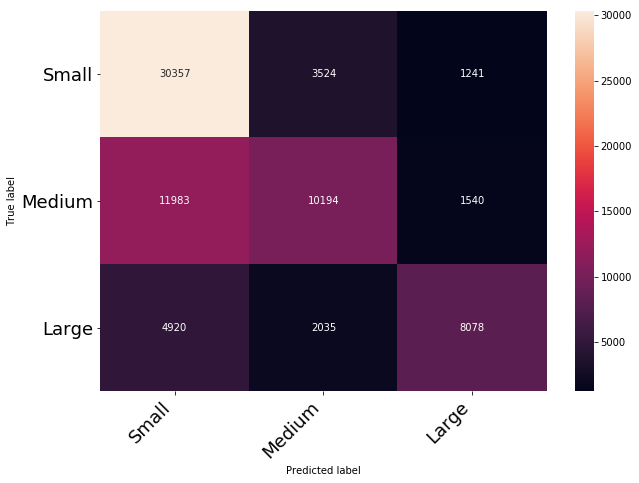

In [95]:
# Without balancing classes (RF)

conf_mat = confusion_matrix(y_true=y_train, y_pred=y_preds)
cm = print_confusion_matrix(conf_mat, class_names=['Small','Medium','Large'])

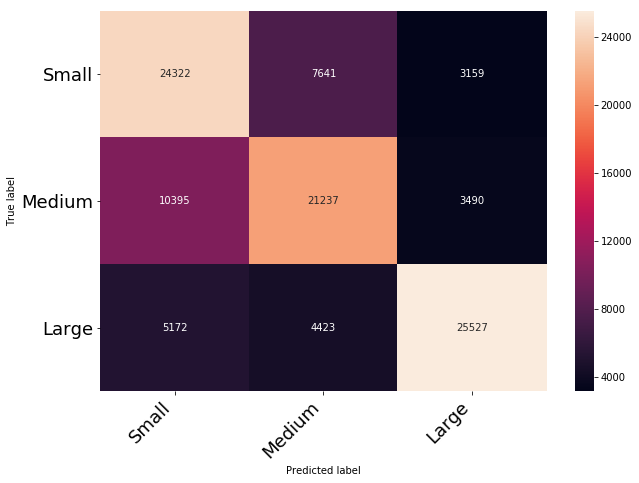

In [117]:
# Balanced classes with SMOTE (oversampling) no class_weight

conf_mat = confusion_matrix(y_true=y_smote, y_pred=y_preds)
cm = print_confusion_matrix(conf_mat, class_names=['Small','Medium','Large'])

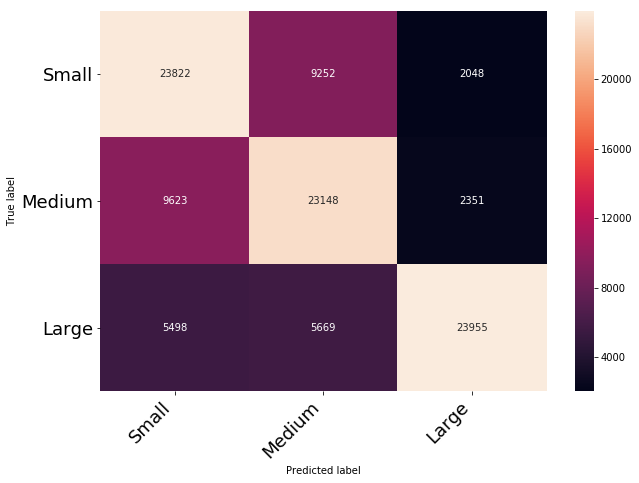

In [205]:
# Balanced classes with SMOTE (oversampling) with class_weight (weighted medium size) test2

conf_mat = confusion_matrix(y_true=y_smote, y_pred=y_preds)
cm = print_confusion_matrix(conf_mat, class_names=['Small','Medium','Large'])

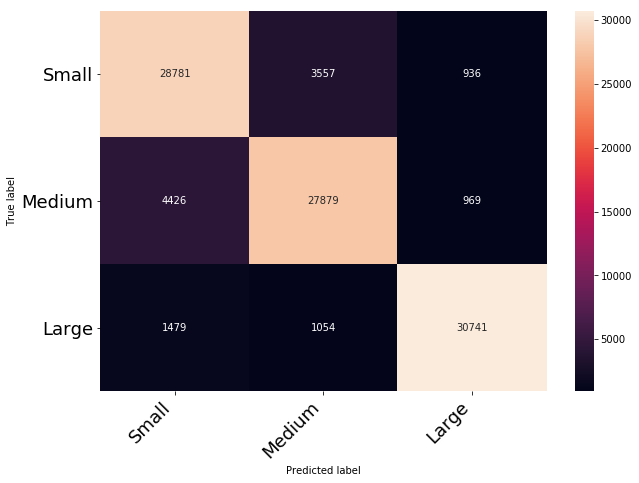

In [281]:
# Balanced classes with SMOTE (oversampling) no class_weight test3

conf_mat = confusion_matrix(y_true=y_smote, y_pred=y_preds)
cm = print_confusion_matrix(conf_mat, class_names=['Small','Medium','Large'])

In [288]:
print(accuracy_score(y_true=y_smote, y_pred=y_preds))
print(classification_report(y_true=y_smote, y_pred=y_preds, target_names=['Small','Medium','Large']))

0.8755685119512733
             precision    recall  f1-score   support

      Small       0.83      0.86      0.85     33274
     Medium       0.86      0.84      0.85     33274
      Large       0.94      0.92      0.93     33274

avg / total       0.88      0.88      0.88     99822



In [290]:
cross_val_score(rf, X=ssx_X_train, y=y_smote, cv=5)

array([0.52326572, 0.51905835, 0.62794891, 0.69892312, 0.72808336])

In [292]:
print(accuracy_score(y_true=y_test, y_pred=rf.predict(ssx_X_test)))
print(classification_report(y_true=y_test, y_pred=rf.predict(ssx_X_test), target_names=['Small','Medium','Large']))

0.5039903542515932
             precision    recall  f1-score   support

      Small       0.58      0.63      0.60      8270
     Medium       0.40      0.37      0.38      5607
      Large       0.47      0.43      0.45      3540

avg / total       0.50      0.50      0.50     17417



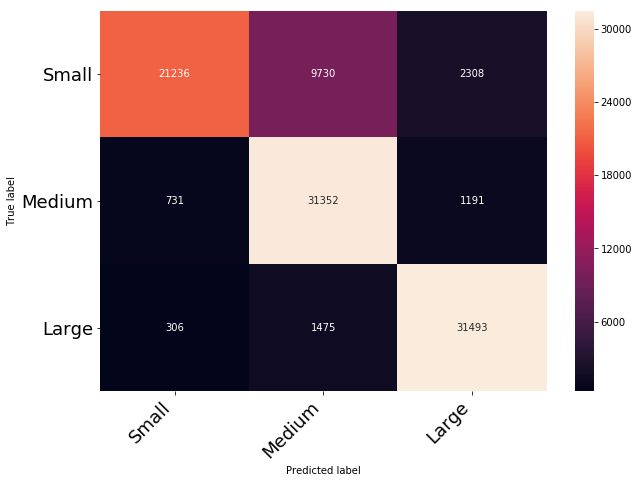

In [507]:
# Balanced classes with SMOTE (oversampling) test3 w/ class weights for medium & large

conf_mat = confusion_matrix(y_true=y_smote, y_pred=y_preds)
cm = print_confusion_matrix(conf_mat, class_names=['Small','Medium','Large'])

In [508]:
print(accuracy_score(y_true=y_smote, y_pred=y_preds))
print(classification_report(y_true=y_smote, y_pred=y_preds, target_names=['Small','Medium','Large']))

0.8423093105728197
             precision    recall  f1-score   support

      Small       0.95      0.64      0.76     33274
     Medium       0.74      0.94      0.83     33274
      Large       0.90      0.95      0.92     33274

avg / total       0.86      0.84      0.84     99822



In [509]:
print(accuracy_score(y_true=y_test, y_pred=rf.predict(ssx_X_test)))
print(classification_report(y_true=y_test, y_pred=rf.predict(ssx_X_test), target_names=['Small','Medium','Large']))

0.4547281391743699
             precision    recall  f1-score   support

      Small       0.58      0.43      0.49      8270
     Medium       0.37      0.50      0.43      5607
      Large       0.42      0.45      0.43      3540

avg / total       0.48      0.45      0.46     17417



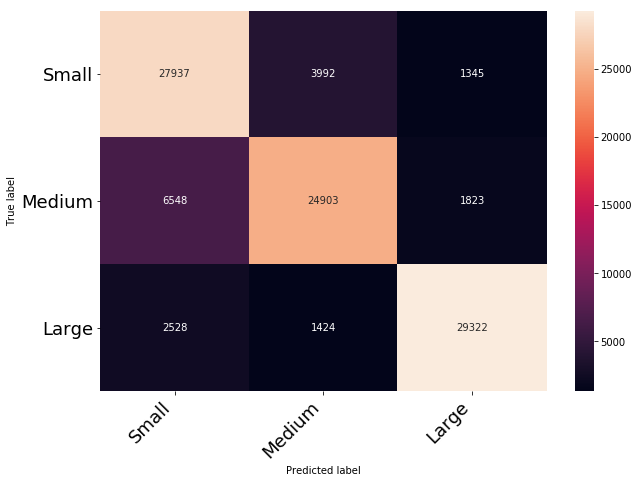

In [379]:
# Balanced classes with SMOTE (oversampling) no class_weight test3 + regularize w/ max_depth

conf_mat = confusion_matrix(y_true=y_smote, y_pred=y_preds)
cm = print_confusion_matrix(conf_mat, class_names=['Small','Medium','Large'])

In [349]:
print(classification_report(y_true=y_smote, y_pred=y_preds, target_names=['Small','Medium','Large']))

             precision    recall  f1-score   support

      Small       0.85      0.81      0.83     33274
     Medium       0.81      0.86      0.84     33274
      Large       0.93      0.92      0.93     33274

avg / total       0.86      0.86      0.86     99822



In [350]:
print(classification_report(y_true=y_test, y_pred=rf.predict(ssx_X_test), target_names=['Small','Medium','Large']))

             precision    recall  f1-score   support

      Small       0.59      0.57      0.58      8270
     Medium       0.40      0.42      0.41      5607
      Large       0.47      0.45      0.46      3540

avg / total       0.50      0.50      0.50     17417



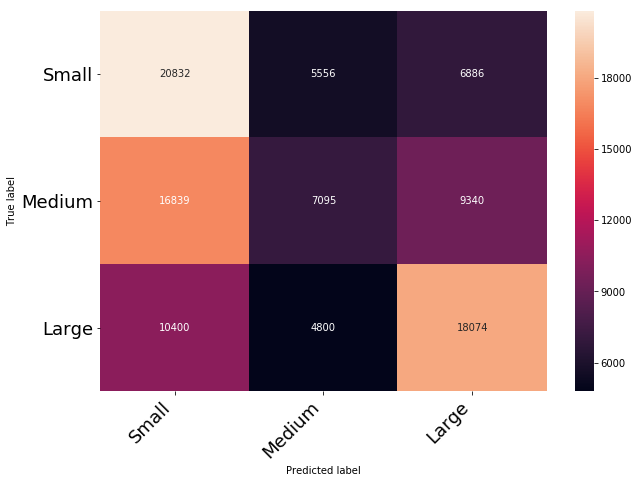

In [395]:
# Balanced classes with SMOTE (oversampling) no class_weight test5

conf_mat = confusion_matrix(y_true=y_smote, y_pred=y_preds)
cm = print_confusion_matrix(conf_mat, class_names=['Small','Medium','Large'])

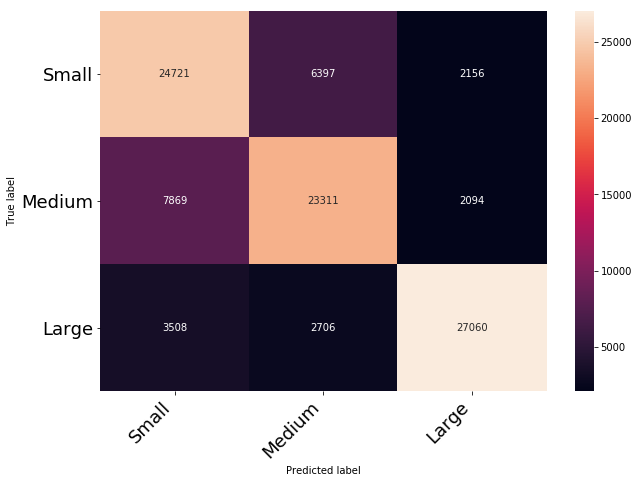

In [301]:
# Balanced classes with SMOTE (oversampling) no class_weight (weighted medium size) test4

conf_mat = confusion_matrix(y_true=y_smote, y_pred=y_preds)
cm = print_confusion_matrix(conf_mat, class_names=['Small','Medium','Large'])

In [302]:
print(classification_report(y_true=y_smote, y_pred=y_preds, target_names=['Small','Medium','Large']))

             precision    recall  f1-score   support

      Small       0.68      0.74      0.71     33274
     Medium       0.72      0.70      0.71     33274
      Large       0.86      0.81      0.84     33274

avg / total       0.76      0.75      0.75     99822



In [303]:
print(classification_report(y_true=y_test, y_pred=rf.predict(ssx_X_test), target_names=['Small','Medium','Large']))

             precision    recall  f1-score   support

      Small       0.58      0.59      0.58      8270
     Medium       0.39      0.38      0.39      5607
      Large       0.42      0.41      0.42      3540

avg / total       0.49      0.49      0.49     17417



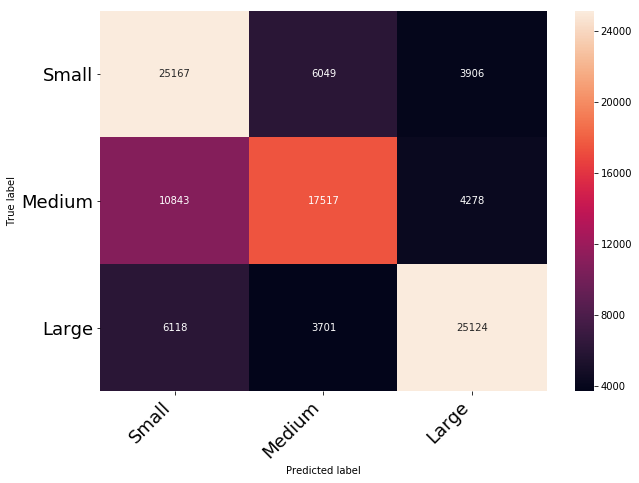

In [131]:
# Balanced classes with ADASYN (oversampling)

conf_mat = confusion_matrix(y_true=y_ada, y_pred=y_preds)
cm = print_confusion_matrix(conf_mat, class_names=['Small','Medium','Large'])

In [430]:
# Trying with top 3 most important features

short_df = df[['Species Size','Incident Month','Aircraft Mass','Aircraft Damage']]
short_df.dropna(axis=0, inplace=True)
short_df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Species Size,Incident Month,Aircraft Mass,Aircraft Damage
0,3,1,4.0,1
1,3,1,4.0,0
2,3,2,3.0,0
3,3,3,4.0,0
4,3,3,5.0,0


In [431]:
Xs = short_df.iloc[:,1:]
ys = short_df.iloc[:,0]

xs_train, xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.2, random_state=5)

In [432]:
from imblearn.under_sampling import RandomUnderSampler

rus_xs_train, rus_ys_train = RandomUnderSampler().fit_sample(xs_train,ys_train)

ss=StandardScaler()
ss_xs_train = ss.fit_transform(rus_xs_train)
ss_xs_test = ss.transform(xs_test)

In [434]:
ss_xs_train.shape, ss_xs_test.shape

((48720, 3), (23389, 3))

In [433]:
rfs = RandomForestClassifier().fit(ss_xs_train, rus_ys_train)

In [435]:
cross_val_score(rfs, X=ss_xs_train, y=rus_ys_train, cv=5)

array([0.46172003, 0.4751642 , 0.4762931 , 0.47752463, 0.46972496])

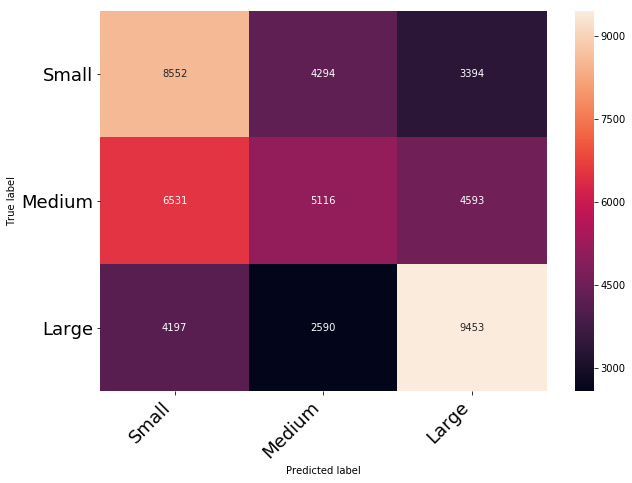

In [436]:
conf_mat = confusion_matrix(y_true=rus_ys_train, y_pred=rfs.predict(ss_xs_train))
cm = print_confusion_matrix(conf_mat, class_names=['Small','Medium','Large'])

# All other models tried when finding base model

### XGBoost

In [647]:
xgb = XGBClassifier().fit(ssx_X_train,y_smote)

In [409]:
xgb.score(ssx_X_train, y_smote)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.45675302037626975

### Logistic Regression

In [641]:
lr = LogisticRegression().fit(ssx_X_train, y_smote)

In [642]:
accuracy_score(y_true=y_smote, y_pred=lr.predict(ssx_X_train))

0.5266774859249465

In [651]:
cross_val_score(estimator=lr,X=ssx_X_train,y=y_smote, cv=10)

array([0.51302083, 0.5249399 , 0.52083333, 0.51973157, 0.52299369,
       0.5281034 , 0.52609959, 0.52840397, 0.53211101, 0.53601844])

### Naive Bayes: Gaussian

In [643]:
nb = GaussianNB().fit(ssx_X_train, y_smote)

In [644]:
accuracy_score(y_true=y_smote, y_pred=nb.predict(ssx_X_train))

0.41601049868766404

In [407]:
cross_val_score(estimator=nb,X=ssx_X_train,y=y_smote, cv=10)

array([0.42057292, 0.41526442, 0.41596554, 0.4208734 , 0.41879571,
       0.41378619, 0.42059914, 0.41969743, 0.41138163, 0.41959723])

### SGD (Stochastic Gradient)

In [645]:
sgd = SGDClassifier(max_iter=1000,alpha=0.001).fit(ssx_X_train, y_smote)

In [646]:
accuracy_score(y_true=y_smote, y_pred=sgd.predict(ssx_X_train))

0.5044579351245216

In [473]:
cross_val_score(estimator=sgd, X=ssx_X_train, y=y_smote, cv=10)

array([0.49889824, 0.50220353, 0.50811298, 0.50040064, 0.4999499 ,
       0.50375714, 0.5114718 , 0.50916742, 0.51738303, 0.50736399])

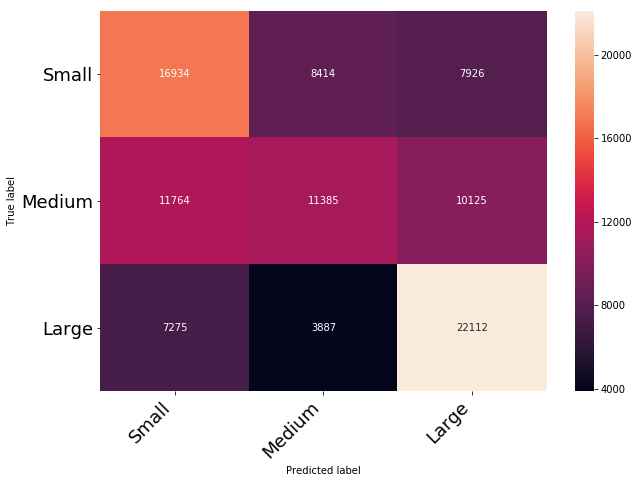

In [474]:
conf_mat = confusion_matrix(y_true=y_smote, y_pred=sgd.predict(ssx_X_train))
cm = print_confusion_matrix(conf_mat, class_names=['Small','Medium','Large'])

### Visualization to show the limitations of binary labels

In [574]:
short1 = test3[test3['Species Size'] == 1][['Species Size','Aircraft Damage','Nose Strike','Nose Damage','Windshield Strike','Windshield Damage']].iloc[0:50,:]
short2 = test3[test3['Species Size'] == 2][['Species Size','Aircraft Damage','Nose Strike','Nose Damage','Windshield Strike','Windshield Damage']].iloc[0:50,:]
short3 = test3[test3['Species Size'] == 3][['Species Size','Aircraft Damage','Nose Strike','Nose Damage','Windshield Strike','Windshield Damage']].iloc[0:50,:]

frames = [short1,short2,short3]
short = pd.concat(frames)

In [578]:
sns.set(style='whitegrid', palette='muted')

melt = pd.melt(short, id_vars='Species Size', var_name='Measurements')


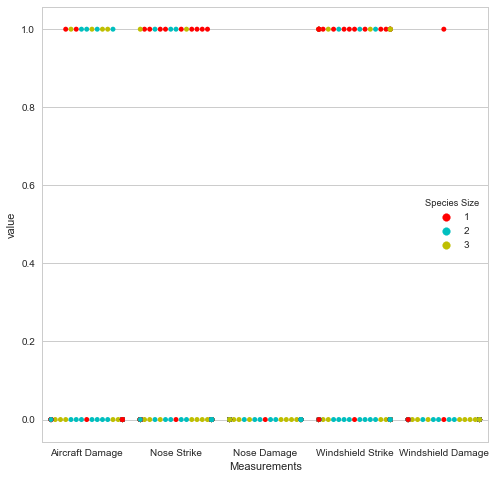

In [579]:
sns.swarmplot(x='Measurements', y='value', hue='Species Size', palette=['r','c','y'], data=melt)
